# Just Friends

In [1]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import pandas as pd
import random, re

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
_input_path = "midi_to_csv/convert/BennyCarter_JustFriends_FINAL_chords.csv"
_output_path = "generated_solos/Carter_Generated.csv"

In [4]:
_input = pd.read_csv(_input_path).drop("chord",1).drop("velocity",1)
_input.head()

,Unnamed: 0,note_name,start_time,duration
0,2,D5,0.104021,0.103217
1,3,F5,0.220643,0.103217
2,4,G5,0.346649,0.132708
3,5,F5,0.490080,0.105898
4,6,D6,0.628150,0.115282


In [5]:
_output = pd.read_csv(_output_path)
_output.head()

,Unnamed: 0,note_name,start_time,duration
0,0,Bb4,0.148,0.066
1,1,G4,0.228,0.151
2,2,F4,0.398,0.057
3,3,Eb4,0.456,0.145
4,4,F4,0.618,0.169


## Note Distribution

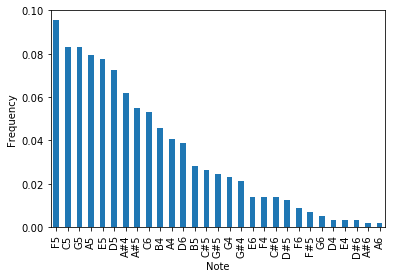

In [7]:
_input_note_name_prop = _input["note_name"].value_counts()/sum(_input["note_name"].value_counts())
x1 = _input_note_name_prop.plot.bar()
x1.set_xlabel("Note")
x1.set_ylabel("Frequency")

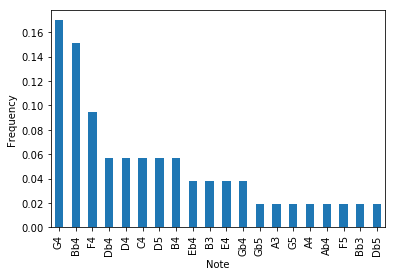

In [8]:
_output_note_name_prop = _output["note_name"].value_counts()/sum(_output["note_name"].value_counts())
x2 = _output_note_name_prop.plot.bar()
x2.set_xlabel("Note")
x2.set_ylabel("Frequency")

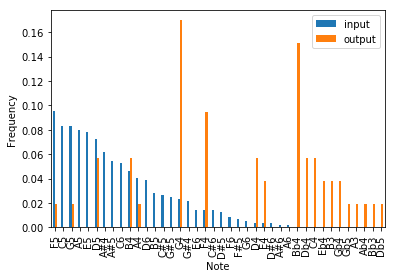

In [9]:
_input_prop_df = pd.DataFrame(_input_note_name_prop).reset_index()
_output_prop_df = pd.DataFrame(_output_note_name_prop).reset_index()
joined_note_name = _input_prop_df.merge(_output_prop_df, on = "index", how = "outer").fillna(0)
joined_note_name.columns = ["note_name", "input","output"]
x1x2 = joined_note_name.plot.bar(x = "note_name")
x1x2.set_xlabel("Note")
x1x2.set_ylabel("Frequency")

## Duration Distribution

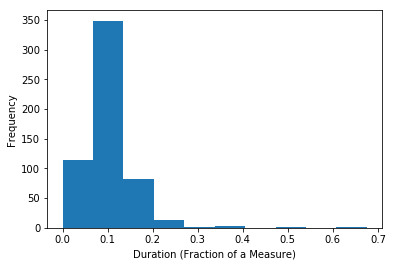

In [10]:
x1 = _input["duration"].plot.hist()
x1.set_xlabel("Duration (Fraction of a Measure)")

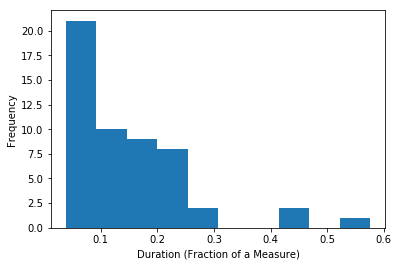

In [11]:
x2 = _output["duration"].plot.hist()
x2.set_xlabel("Duration (Fraction of a Measure)")

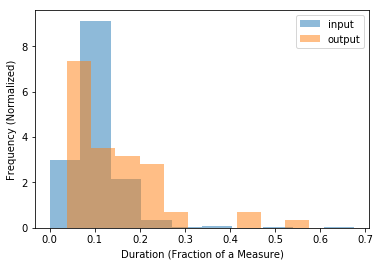

In [12]:
x1 = _input["duration"]
x2 = _output["duration"]

plt.hist(x1, normed = True, alpha = 0.5, label = 'input') #, bins, alpha=0.5, label='x')
plt.hist(x2, normed = True, alpha = 0.5, label = 'output') #, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.xlabel("Duration (Fraction of a Measure)")
plt.ylabel("Frequency (Normalized)")
plt.show()